# S14 T01: NoSQL Data Bases - MongoDB

**Objectives:**
 - Use MongoDB DataBases
 - Interconnect MongoDB with Python.

## Level 1
### Exercise 1
**Create a NoSQL database using MongoDB and add to it some examples that allow you to check if you are able to process basic information.**

### Exercise 2
**Connect the NoSQL database to Python using pymongo.**

In [109]:
#pip install pymongo

In [110]:
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In MongoDB, a database is not created until it gets content, so we need to complete some steps before we can check if the database has been created correctly

We create the MongoDB using MongoDB Compass and connected using python

In [111]:
# Connect to the Database
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["ShopMongoDB"]

# Connect a Collection
mycol = mydb["CollectionShopMongoDB"]

We check that the database has been connected correctly

In [112]:
# Check list of the system databases
print(myclient.list_database_names())

['ShopMongoDB', 'admin', 'config', 'local']


In [113]:
# Check if collection exist
print(mydb.list_collection_names())

['CollectionShopMongoDB']


In [114]:
# Check if the information was upload correctly
for x in mycol.find():
  print(x)

{'_id': ObjectId('623eb85e32d8c5ce18312f74'), '': '0', 'purchase_date': '2020-07-04', 'customer_name': 'Peter', 'customer_surname': 'Cat', 'customer_telephone': '678912345', 'product_name': 'Banana', 'product_price': '4.5', 'employee_name': 'Viola', 'employee_surname': 'Mountain', 'employee_adress': 'Calle Tarragona', 'employee_adress_num': '12', 'employee_ZIP': '8006', 'employee_telephone': '684930211', 'product_type_name': 'Fresh', 'shop_name': 'Bon Preu Diagonal', 'shop_adress': 'Av Diagonal', 'shop_adress_num': '343', 'shop_ZIP': '8030', 'shop_telephone': '938912345', 'employee_fullname': 'Viola Mountain'}
{'_id': ObjectId('623eb85e32d8c5ce18312f75'), '': '1', 'purchase_date': '2020-07-04', 'customer_name': 'Peter', 'customer_surname': 'Cat', 'customer_telephone': '678912345', 'product_name': 'Apple', 'product_price': '6.5', 'employee_name': 'Viola', 'employee_surname': 'Mountain', 'employee_adress': 'Calle Tarragona', 'employee_adress_num': '12', 'employee_ZIP': '8006', 'employee_

## Level 2 
### Exercise 1
**Load some simple cases into a Pandas Dataframe.**

Let's insert a new purchase in the shop database

In [115]:
mydict = {
    "purchase_date": "2020-07-04",
    "customer_name": "Peter",
    "customer_surname": "Cat",
    "customer_telephone": "678912345",
    "product_name": "Banana",
    "product_price": "4.5",
    "employee_name": "Viola",
    "employee_surname": "Mountain",
    "employee_adress": "Calle Tarragona",
    "employee_adress_num": "12",
    "employee_ZIP": "8006",
    "employee_telephone": "684930211",
    "product_type_name": "Fresh",
    "shop_name": "Bon Preu Diagonal",
    "shop_adress": "Av Diagonal",
    "shop_adress_num": "343",
    "shop_ZIP": "8030",
    "shop_telephone": "938912345",
    "employee_fullname": "Viola Mountain"
}

response = mycol.insert_one(mydict)

#To check if the info has been included correctly
response.inserted_id

ObjectId('623ee0aab63a7f28fee583e2')

In [116]:
# Count the number of clients called Peter
find = mycol.find({'customer_name': 'Peter'})

print ('The database has', len(list(find)) ,'customers called Peter')

The database has 13 customers called Peter


In [117]:
# Sort the database by shop_name
mydoc = mycol.find().sort('shop_name')

# save the sorted DB into a Pandas Dataframe
shops_df = pd.DataFrame(list(mydoc))

In [118]:
shops_df.head(10)

,_id,,purchase_date,customer_name,customer_surname,customer_telephone,product_name,product_price,employee_name,employee_surname,...,product_type_name,shop_name,shop_adress,shop_adress_num,shop_ZIP,shop_telephone,employee_fullname,customer_adress,customer_adress_num,customer_ZIP
0,623eb85e32d8c5ce18312f74,0,2020-07-04,Peter,Cat,678912345,Banana,4.5,Viola,Mountain,...,Fresh,Bon Preu Diagonal,Av Diagonal,343,8030,938912345,Viola Mountain,NaN,NaN,NaN
1,623eb85e32d8c5ce18312f75,1,2020-07-04,Peter,Cat,678912345,Apple,6.5,Viola,Mountain,...,Fresh,Bon Preu Diagonal,Av Diagonal,343,8030,938912345,Viola Mountain,NaN,NaN,NaN
2,623eb85e32d8c5ce18312f76,2,2020-07-04,Peter,Cat,678912345,Bread,1.4,Viola,Mountain,...,Bakery,Bon Preu Diagonal,Av Diagonal,343,8030,938912345,Viola Mountain,NaN,NaN,NaN
3,623eb85e32d8c5ce18312f77,3,2020-07-04,Peter,Cat,678912345,Burguer,8.9,Viola,Mountain,...,Meat,Bon Preu Diagonal,Av Diagonal,343,8030,938912345,Viola Mountain,NaN,NaN,NaN
4,623eb85e32d8c5ce18312f78,4,2020-07-04,Peter,Cat,678912345,Chicken,6.5,Viola,Mountain,...,Meat,Bon Preu Diagonal,Av Diagonal,343,8030,938912345,Viola Mountain,NaN,NaN,NaN
5,623eb85e32d8c5ce18312f79,5,2020-07-04,Peter,Cat,678912345,Prawn,10.25,Viola,Mountain,...,Seafood,Bon Preu Diagonal,Av Diagonal,343,8030,938912345,Viola Mountain,NaN,NaN,NaN
6,623eb85e32d8c5ce18312f7a,6,2020-07-04,Peter,Cat,678912345,Cod,6.5,Viola,Mountain,...,Seafood,Bon Preu Diagonal,Av Diagonal,343,8030,938912345,Viola Mountain,NaN,NaN,NaN
7,623eb85e32d8c5ce18312f7b,7,2020-07-04,Peter,Cat,678912345,Tissues,1.0,Viola,Mountain,...,Pharmacy,Bon Preu Diagonal,Av Diagonal,343,8030,938912345,Viola Mountain,NaN,NaN,NaN
8,623ebcf5b63a7f28fee583dc,NaN,2020-07-04,Peter,Cat,678912345,Banana,4.5,Viola,Mountain,...,Fresh,Bon Preu Diagonal,Av Diagonal,343,8030,938912345,Viola Mountain,NaN,NaN,NaN
9,623ebd99b63a7f28fee583dd,NaN,2020-07-04,Peter,Cat,678912345,Banana,4.5,Viola,Mountain,...,Fresh,Bon Preu Diagonal,Av Diagonal,343,8030,938912345,Viola Mountain,NaN,NaN,NaN


## Level 3
### Exercise 1
**Create an statistic summary of the database information.**

In [119]:
shops_df.columns

Index(['_id', '', 'purchase_date', 'customer_name', 'customer_surname',
       'customer_telephone', 'product_name', 'product_price', 'employee_name',
       'employee_surname', 'employee_adress', 'employee_adress_num',
       'employee_ZIP', 'employee_telephone', 'product_type_name', 'shop_name',
       'shop_adress', 'shop_adress_num', 'shop_ZIP', 'shop_telephone',
       'employee_fullname', 'customer_adress', 'customer_adress_num',
       'customer_ZIP'],
      dtype='object')

In [120]:
# Convert the product price into a float
dict_columns_type = {'product_price': float}

shops_df = shops_df.astype(dict_columns_type)

In [121]:
shops_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _id                  39 non-null     object 
 1                        34 non-null     object 
 2   purchase_date        39 non-null     object 
 3   customer_name        39 non-null     object 
 4   customer_surname     39 non-null     object 
 5   customer_telephone   39 non-null     object 
 6   product_name         39 non-null     object 
 7   product_price        39 non-null     float64
 8   employee_name        39 non-null     object 
 9   employee_surname     39 non-null     object 
 10  employee_adress      39 non-null     object 
 11  employee_adress_num  39 non-null     object 
 12  employee_ZIP         39 non-null     object 
 13  employee_telephone   39 non-null     object 
 14  product_type_name    39 non-null     object 
 15  shop_name            39 non-null     objec

In [122]:
shops_df.describe()

,product_price
count,39.000000
mean,5.438462
std,2.594363
min,1.000000
25%,4.500000
50%,6.500000
75%,6.500000
max,10.250000


Text(0.5, 0, 'Product Price (€)')

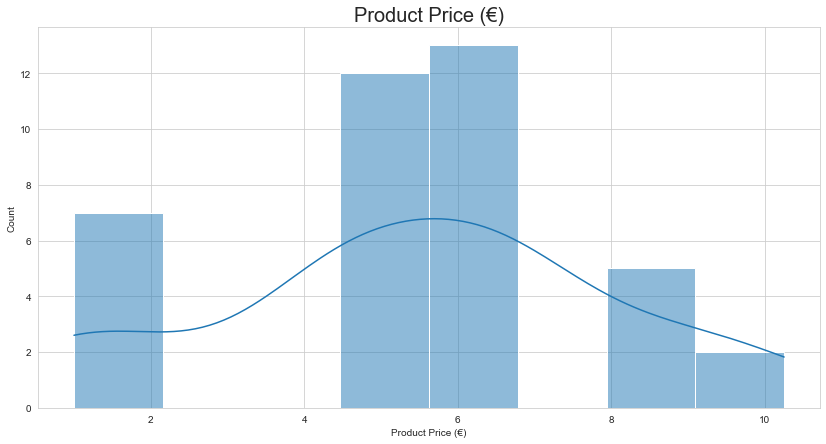

In [123]:
plt.figure(figsize=(14,7))
sns.set_style("whitegrid")

sns.histplot(data=shops_df, x = 'product_price', kde='True')
plt.title('Product Price (€)', size=20);
plt.xlabel('Count');
plt.xlabel('Product Price (€)')

50% of the products cost from 4.5€ to 6.5€

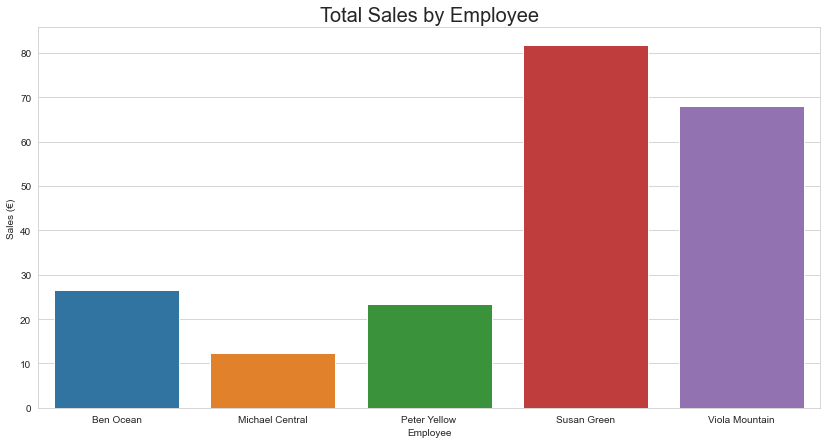

In [124]:
# Create a new column with the employs full name
shops_df['employee_fullname'] = shops_df['employee_name'] + " " + shops_df['employee_surname']

shops_df_employee_sales = shops_df.groupby(['employee_fullname'], as_index=False).sum()

plt.figure(figsize=(14,7))
sns.barplot(data=shops_df_employee_sales, x='employee_fullname', y= 'product_price')
plt.title('Total Sales by Employee', size=20)
plt.xlabel('Employee');
plt.ylabel('Sales (€)');

Susan Green is the best seller employee.

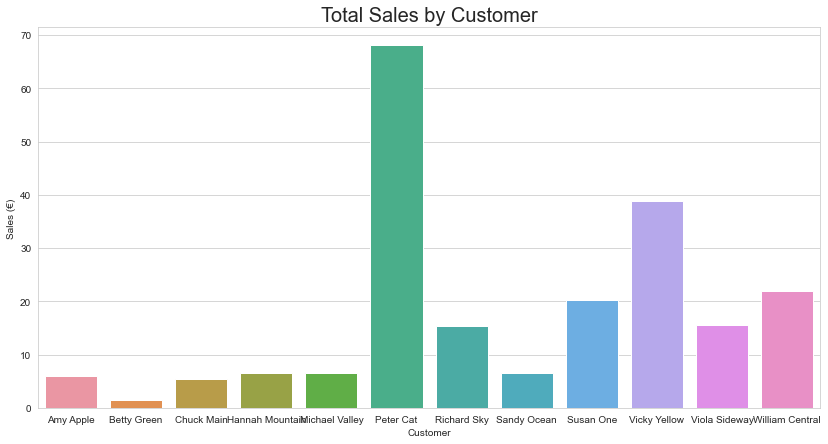

In [125]:
# Create a new column with the employs full name
shops_df['customer_fullname'] = shops_df['customer_name'] + " " + shops_df['customer_surname']

shops_df_employee_sales = shops_df.groupby(['customer_fullname'], as_index=False).sum()

plt.figure(figsize=(14,7))
sns.barplot(data=shops_df_employee_sales, x='customer_fullname', y= 'product_price')
plt.title('Total Sales by Customer', size=20)
plt.xlabel('Customer');
plt.ylabel('Sales (€)');

50% of the customers spend less than 10€

Peter Cat is the customer that spend more money

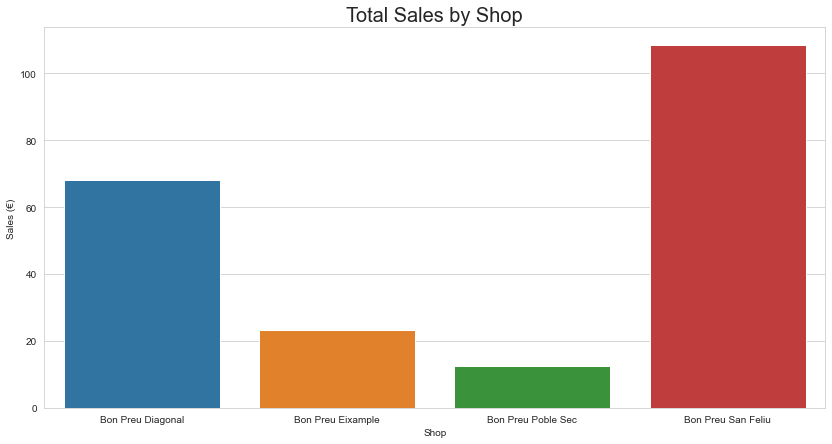

In [126]:
shops_df_shop_sales = shops_df.groupby(['shop_name'], as_index=False).sum()

plt.figure(figsize=(14,7))
sns.barplot(data=shops_df_shop_sales, x='shop_name', y= 'product_price')
plt.title('Total Sales by Shop', size=20)
plt.xlabel('Shop');
plt.ylabel('Sales (€)');

Bon Preu San Feliu is the shop with more Sales

In [127]:
shops_df['shop_name'][shops_df['customer_fullname'] == 'Peter Cat']

0     Bon Preu Diagonal
1     Bon Preu Diagonal
2     Bon Preu Diagonal
3     Bon Preu Diagonal
4     Bon Preu Diagonal
5     Bon Preu Diagonal
6     Bon Preu Diagonal
7     Bon Preu Diagonal
8     Bon Preu Diagonal
9     Bon Preu Diagonal
10    Bon Preu Diagonal
11    Bon Preu Diagonal
12    Bon Preu Diagonal
Name: shop_name, dtype: object

Peter Cat big shopping was purchased in Bon Preu Diagonal, so he didn´t contribute to make Bon Preu San Feliu the best shop seller.

Let´s list the purchases in Bon Preu San Feliu

In [128]:
shops_df[shops_df['shop_name'] == 'Bon Preu San Feliu']

,_id,,purchase_date,customer_name,customer_surname,customer_telephone,product_name,product_price,employee_name,employee_surname,...,shop_name,shop_adress,shop_adress_num,shop_ZIP,shop_telephone,employee_fullname,customer_adress,customer_adress_num,customer_ZIP,customer_fullname
20,623eb85e32d8c5ce18312f83,15,2020-07-06,Richard,Sky,689740352,Apple,6.50,Ben,Ocean,...,Bon Preu San Feliu,Av Barcelona,33,8980,934689862,Ben Ocean,NaN,NaN,NaN,Richard Sky
21,623eb85e32d8c5ce18312f84,16,2020-07-05,Susan,One,683947284,Burguer,8.90,Ben,Ocean,...,Bon Preu San Feliu,Av Barcelona,33,8980,934689862,Ben Ocean,NaN,NaN,NaN,Susan One
22,623eb85e32d8c5ce18312f85,17,2020-07-05,Susan,One,683947284,Prawn,10.25,Ben,Ocean,...,Bon Preu San Feliu,Av Barcelona,33,8980,934689862,Ben Ocean,NaN,NaN,NaN,Susan One
23,623eb85e32d8c5ce18312f86,18,2020-07-05,Susan,One,683947284,Tissues,1.00,Ben,Ocean,...,Bon Preu San Feliu,Av Barcelona,33,8980,934689862,Ben Ocean,NaN,NaN,NaN,Susan One
24,623eb85e32d8c5ce18312f87,19,2020-07-06,Vicky,Yellow,618293045,Cod,6.50,Susan,Green,...,Bon Preu San Feliu,Av Barcelona,33,8980,934689862,Susan Green,NaN,NaN,NaN,Vicky Yellow
25,623eb85e32d8c5ce18312f88,20,2020-07-06,Vicky,Yellow,618293045,Burguer,8.90,Susan,Green,...,Bon Preu San Feliu,Av Barcelona,33,8980,934689862,Susan Green,NaN,NaN,NaN,Vicky Yellow
26,623eb85e32d8c5ce18312f89,21,2020-07-06,Vicky,Yellow,618293045,Apple,6.50,Susan,Green,...,Bon Preu San Feliu,Av Barcelona,33,8980,934689862,Susan Green,NaN,NaN,NaN,Vicky Yellow
27,623eb85e32d8c5ce18312f8a,22,2020-07-04,Vicky,Yellow,618293045,Banana,4.50,Susan,Green,...,Bon Preu San Feliu,Av Barcelona,33,8980,934689862,Susan Green,NaN,NaN,NaN,Vicky Yellow
28,623eb85e32d8c5ce18312f8b,23,2020-07-04,Vicky,Yellow,618293045,Chicken,6.50,Susan,Green,...,Bon Preu San Feliu,Av Barcelona,33,8980,934689862,Susan Green,NaN,NaN,NaN,Vicky Yellow
29,623eb85e32d8c5ce18312f8c,24,2020-07-04,Vicky,Yellow,618293045,Bread,1.40,Susan,Green,...,Bon Preu San Feliu,Av Barcelona,33,8980,934689862,Susan Green,NaN,NaN,NaN,Vicky Yellow
